Pour installer ``pyrasta`` :
* ``pip install pyrasta`` dans un terminal (et dans votre environnement conda)
* ``!pip install pyrasta`` dans un Jupyter notebook

In [1]:
# !pip install pyrasta

In [2]:
from pyrasta.raster import Raster

In [3]:
red = Raster("/home/benjamin/Documents/PRO/PRODUITS/SENTINEL/S2A_MSIL1C_20201006T132241_N0209_R038_T23LKC_20201006T151824.SAFE/GRANULE/L1C_T23LKC_A027634_20201006T132239/IMG_DATA/T23LKC_20201006T132241_B04.jp2")
nir = Raster("/home/benjamin/Documents/PRO/PRODUITS/SENTINEL/S2A_MSIL1C_20201006T132241_N0209_R038_T23LKC_20201006T151824.SAFE/GRANULE/L1C_T23LKC_A027634_20201006T132239/IMG_DATA/T23LKC_20201006T132241_B08.jp2")

#### Formule du NDVI
![image](data/NDVI.png)

In [4]:
NDVI = (nir - red) / (nir + red)

In [5]:
NDVI.to_file("data/ndvi.tif")

0

In [6]:
import geopandas as gpd

In [7]:
parcelles = gpd.GeoDataFrame.from_file("data/PARCELLES/parcelles.shp")

<Axes: >

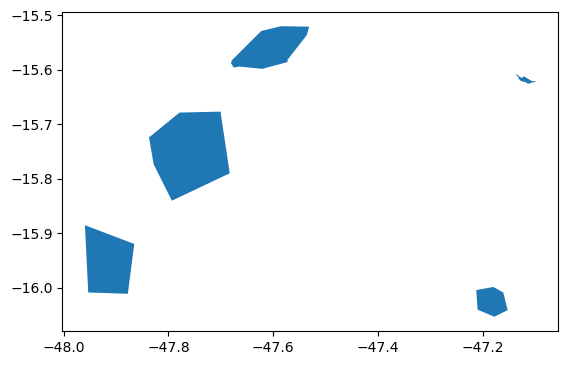

In [8]:
parcelles.plot()

In [9]:
parcelles = parcelles.to_crs(NDVI.crs)

<Axes: >

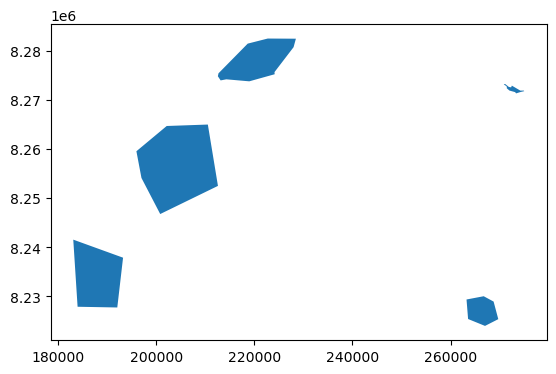

In [10]:
parcelles.plot()

In [11]:
mean_ndvi = NDVI.zonal_stats(parcelles, stats=['mean'])

Compute zonal mean: 100%|███████████████████| 5.00/5.00 [00:00<00:00, 95.3kit/s]


In [12]:
mean_ndvi

{'mean': [0.35925752, 0.40590978, -0.06341866, 0.30328745, nan]}